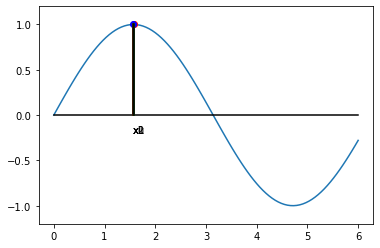

d=  0.001038421630273319
x1= 1.5709148719709654 x2= 1.5705182302028542
Iteration:  17
Error: 0.040864209648753536


In [20]:
#https://www.geodose.com/2021/06/golden-section-search-python-application-example.html
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
#from IPython.display import display, update_display
import time

def func_fx(x):
    fx=np.sin(x)
    return fx

def check_pos(x1,x2):
    if x2<x1:
        label='right'
    else:
        lable=''
    return label

def update_interior(xl,xu):
    d=((np.sqrt(5)-1)/2)*(xu-xl)
    print('d= ',d)
    x1=xl+d
    x2=xu-d
    print('x1=',x1,'x2=',x2)
    return x1,x2

#Finding Maximum Function
def find_max(xl,xu,x1,x2,label):
    fx1=func_fx(x1)
    fx2=func_fx(x2)
    if fx2>fx1 and label=='right':
        xl=xl
        xu=x1
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x2
    else:
        xl=x2
        xu=xu
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x1
    return xl,xu,xopt
    
#Finding Minimum Function
def find_min(xl,xu,x1,x2,label):
    fx1=func_fx(x1)
    fx2=func_fx(x2)
    if fx2>fx1 and label=='right':
        xl=x2
        xu=xu
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x1
    else:
        xl=xl
        xu=x1
        new_x=update_interior(xl,xu)
        x1=new_x[0]
        x2=new_x[1]
        xopt=x2
    print('xopt= ',xopt)
    return xl,xu,xopt

#Plotting Function
def plot_graph(xl,xu,x1,x2):
    clear_output(wait=True)

    #plot sinus graph
    plt.plot(x,y)
    plt.plot([0,6],[0,0],'k')

    #plot x1 point
    plt.plot(x1,func_fx(x1),'ro',label='x1')
    plt.plot([x1,x1],[0,func_fx(x1)],'k')

    #plot x2 point
    plt.plot(x2,func_fx(x2),'bo',label='x2')
    plt.plot([x2,x2],[0,func_fx(x2)],'k')

    #plot xl line
    plt.plot([xl,xl],[0,func_fx(xl)])
    plt.annotate('xl',xy=(xl-0.01,-0.2))


    #plot xu line
    plt.plot([xu,xu],[0,func_fx(xu)])
    plt.annotate('xu',xy=(xu-0.01,-0.2))

    #plot x1 line
    plt.plot([x1,x1],[0,func_fx(x1)],'k')
    plt.annotate('x1',xy=(x1-0.01,-0.2))

    #Plot x2 line
    plt.plot([x2,x2],[0,func_fx(x2)],'k')
    plt.annotate('x2',xy=(x2-0.01,-0.2))

    #y-axis limit
    plt.ylim([-1.2,1.2])
    plt.show()
    
def golden_search(xl,xu,mode,et):
    it=0
    e=1
    while e>et:
        new_x=update_interior(xl,xu)
        print('new_x= ',new_x)
        x1=new_x[0]
        x2=new_x[1]
        print('x1= ',x1,'x2= ',x2)
        fx1=func_fx(x1)
        fx2=func_fx(x2)
        label=check_pos(x1,x2)
        clear_output(wait=True)
        plot_graph(xl,xu,x1,x2) #PLOTTING
        plt.show()

        #SELECTING AND UPDATING BOUNDARY-INTERIOR POINTS
        if mode=='max':
            new_boundary=find_max(xl,xu,x1,x2,label)
        elif mode=='min':
            new_boundary=find_min(xl,xu,x1,x2,label)
        else:
            print('Please define min/max mode')
            break #exit if mode not min or max
        xl=new_boundary[0]
        xu=new_boundary[1]
        xopt=new_boundary[2]
        
        it+=1
        print ('Iteration: ',it)
        r=(np.sqrt(5)-1)/2 #GOLDEN RATIO
        e=((1-r)*(abs((xu-xl)/xopt)))*100 #Error
        print('Error:',e)
        time.sleep(1)
    
#Generate point for SINE graph
x=np.linspace(0,6,100)
y=func_fx(x)

#Executing golden search function
golden_search(0,6,'max',0.05)

    











             

    
